In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from statistics import mean
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web
from scipy.stats import skew, kurtosis

1. Central Limit Theorem (3 marks). Student’s t(k) distribution is a well-known (it is implemented in
scipy) but quite complicated family of probability distributions parametrized by a real number k > 0.
There is no closed-form expression for the probability distribution
Pn =
1
n
Xn
i=1
P
when P is a Student distribution (unlike the case of the Normal distribution which you covered in the last
lab). In this exercise, you will use the Central Limit Theorem (CLT) to approximate this distribution.
The CLT states that for sufficiently large values of N, the sample mean of N independent and identically
distributed t-distributions t(k) (where k is a parameter of the distribution called degrees of freedom) is
approximately given by a Normal Distribution with mean µ(t(k)) = 0 and variance V ar(t(k))
N =
k
(k−2)N
.
Follow these steps:
(a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable
size = 100, 000.
(b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(k)
(c) Compute the sample average along each row (i.e. you should get size sample averages), and plot
their histogram in a subplot.
(d) Over the histogram (i.e. in the same subplot), plot the approximate density of the distribution of
sample averages which is given by the CLT as described above.
(e) In a separate subplot, display the QQ plot of the sample means versus their approximate distribution
For which value N is the approximate density of sample means given by the CLT a good approximation
of the actual distribution from which you’ve drawn samples? Briefly justify your answer.

In [2]:
k=3
N=[5,10,30]
size=100000
samples=[0]*3
students_mean = 0
sample_means = [0]*3
sample_means_pdf = [0]*3

def students_variance(num):
    return k/((k-2)*num)

In [3]:
for index, n in enumerate(N):
    temp_array = [0]*size
    for i in range(size):
        temp_array[i] = t.rvs(k,size=n)
    samples[index] = temp_array

In [4]:
for index, n in enumerate(N):
    temp_array1 = [0]*size
    for i in range(size):
        temp_array1[i] = mean(samples[index][i])
    sample_means[index] = temp_array1
    

In [5]:
sub_samples = [0]*3
for index, n in enumerate(N):
    sub_samples[index] = np.linspace(students_mean - 5 * np.sqrt(students_variance(n)), students_mean + 5 * np.sqrt(students_variance(n)), 100)
    sample_means_pdf[index] = stats.norm.pdf(sub_samples[index], students_mean, np.sqrt(students_variance(n)))

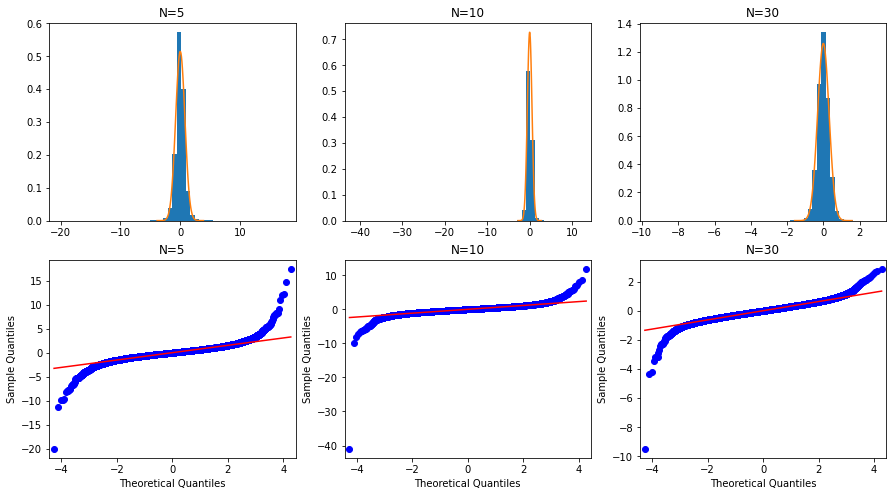

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))


axs[0, 0].hist(sample_means[0],bins=50, density=True)
axs[0,0].plot(sub_samples[0],sample_means_pdf[0])
axs[0, 0].set_title('N=5')

axs[0, 1].hist(sample_means[1],bins=50, density=True)
axs[0,1].plot(sub_samples[1],sample_means_pdf[1])
axs[0, 1].set_title('N=10')

axs[0, 2].hist(sample_means[2],bins=50,  density=True)
axs[0,2].plot(sub_samples[2],sample_means_pdf[2])
axs[0, 2].set_title('N=30')

#for QQ plot

sm.qqplot(np.array(sample_means[0]),line='s',ax=axs[1, 0]);
axs[1, 0].set_title('N=5')

sm.qqplot(np.array(sample_means[1]),line='s',ax=axs[1, 1]);
axs[1, 1].set_title('N=10')

sm.qqplot(np.array(sample_means[2]),line='s',ax=axs[1, 2]);
axs[1, 2].set_title('N=30')
    
plt.show()

The value N=30 is giving a good approximation of the CLT, since with the increase of sample size we can see that the graph is converging into a normal distribution in the histogram and pdf plot. It is proved further with the QQ plot where the quantile of the sample means is closely following the quantile of the normal distribution.

2. (7 marks) Download the Dow Jones Industrial Average from Stooq using the following code. Do NOT
make any local copies of your data!
1 import pandas_datareader . data a s web
2
3 data = web . DataReader ( ’^DJI ’ , ’ s too q ’ , s t a r t=’ 1995−01−01 ’ , end=’
2023−11−14 ’ )
4 data = data . r e s e t_i n d e x ( )
5 da t e s = data [ "Date" ]
6 dow = data [ " Clo se " ] . to_numpy ( )
7
(a) Plot this times series.
(b) Compute the time series of (percentage) daily returns using the formula
Returnt = 100 ×

Closet
Closet−1
− 1

.
(c) Compute the length-n sample averages of daily returns, starting at the first datapoint, for every
n ≥ 100. Thus the first datapoint in this time series will be the average of the first 100 daily returns,
the second will be the average of the first 101 daily returns, etc., and the last will be the average of
all daily returns. Plot this timeseries. Does it look like it obeys the weak Law of Large Numbers? If
yes explain why, if not explain why this might be the case.
(d) Compute the length-100 rolling averages of daily returns. Plot a histogram of these sample averages.
Repeat with length-400 rolling averages. Does it look like these obey the Central Limit Theorem? If
yes explain why, if not explain why this might be the case.

(e) Compute the sample mean, variance, skewness and kurtosis of the daily returns. Based on this
information, suggest which family of distributions might model these daily returns. Briefly justify
your choice.
(f) For this choice of family, you will now estimate the parameter(s) which best explain the data using
the Maximum Likelihood Estimator approach. To achieve this:
• Implement the function which needs to be maximized (this was explained in the lectures). The
parameter(s) which you are trying to estimate must of course be inputs to this function.
• Using the minimize function from scipy.optimize, find the optimal parameters. (Hint: maximizing f(x) is the same thing as minimizing −f(x)). You can use any of the actual minimization
methods, as long as it gives you a sensible answer.
• Once you have found the optimal parameters, plot the PDF of your optimal distribution against
a histogram of the daily returns.
(g) Check the results you obtained in the previous step by comparing it with the parameters you obtain
from scipy’s fit function. Again, plot the PDF of the distribution with these parameters against a
histogram of the daily returns.


In [7]:
# Fetch Dow Jones data
data = web.DataReader('^DJI', 'stooq', start='1995-01-01', end='2023-11-14')
data = data.reset_index()
dates = data["Date"]
dow = data["Close"].to_numpy()

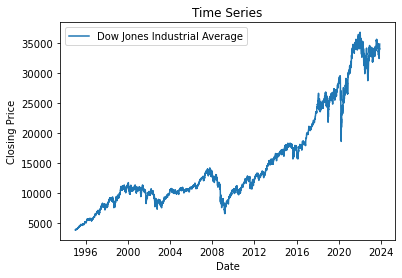

In [8]:
# a) Plotting the time series
plt.plot(dates, dow, label='Dow Jones Industrial Average')
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [9]:
# b) Percentage Daily Returns
daily_returns = data['Close']
daily_returns_pct= daily_returns.pct_change()*100

In [10]:
# c) Computing Length-n Sample Averages of Daily Returns
sample_averages_daily_returns = []
length_n_values = range(100, len(daily_returns_pct) + 1)
for i in length_n_values:
    sample_averages_daily_returns.append(np.mean(daily_returns_pct[:i]))

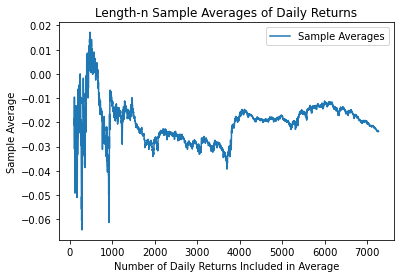

In [11]:
# Plotting time series
plt.plot(length_n_values, sample_averages_daily_returns, label='Sample Averages')
plt.title('Length-n Sample Averages of Daily Returns')
plt.xlabel('Number of Daily Returns Included in Average')
plt.ylabel('Sample Average')
plt.legend()

From the graph we can clearly see that it follows the weak law of large numbers, the reason is as the sample size of sample averages increase in the graph we can see it converging and this converges towards the true mean.  

In [12]:
# d) Computing length-100 rolling averages
length_100_rolling_average = daily_returns_pct.rolling(window=100).mean()

# Computing length-400 rolling averages
length_400_rolling_average = daily_returns_pct.rolling(window=400).mean()

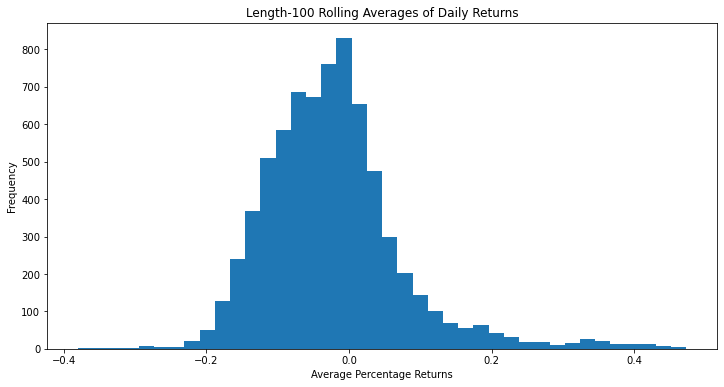

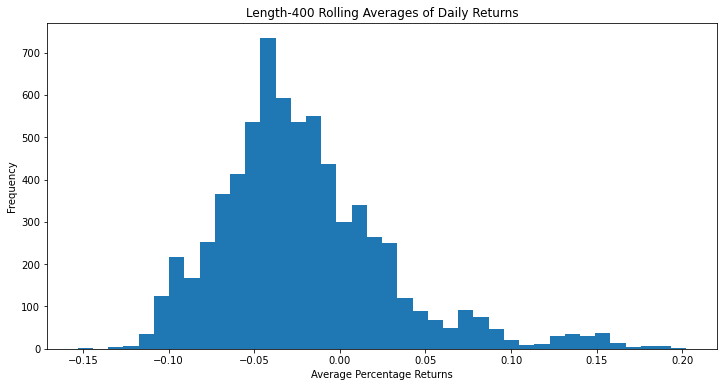

In [13]:
# Plot histogram for length-100 rolling averages
plt.figure(figsize=(12, 6))
plt.hist(length_100_rolling_average, bins=40)
plt.title('Length-100 Rolling Averages of Daily Returns')
plt.xlabel('Average Percentage Returns')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for length-400 rolling averages
plt.figure(figsize=(12, 6))
plt.hist(length_400_rolling_average, bins=40)
plt.title('Length-400 Rolling Averages of Daily Returns')
plt.xlabel('Average Percentage Returns')
plt.ylabel('Frequency')
plt.show()

It does not obey the CLT as we can we see that the distribution formed is not a normal distribution. We can see from the graph that the plot has heavy tails which tells us that there are extreme values present in the dataset which shifts the probability mass towards them thus creating a skewed distribution. Moreover, with the dataset dependent on the time series it also could be the reason  why the CLT did not appear since CLT requires data that are independent among the observations.

In [14]:
# e) Descriptive statistics using pandas
daily_returns_mean = np.mean(daily_returns_pct)
daily_returns_variance = np.var(daily_returns_pct)
print('Mean: ',daily_returns_mean)
print('Skewness: ',daily_returns_pct.skew())
print('Kurtosis: ',daily_returns_pct.kurt())
print('Variance: ',daily_returns_variance)

Mean:  -0.02372295541012489
Skewness:  0.6481969061545365
Kurtosis:  12.987573014493176
Variance:  1.3280669272904733


From this we can gather that it is not a normal distribution as proved by the heavy tailed from the kutosis. But despite this, it also shows that with the mean nearly equal to 0, slightly skewed and variance nearly equal to 1 that it follows closely to the normal distribution. From this I concur that the distribution that closely follows the normal distribution with heavy tails is the t distribution.

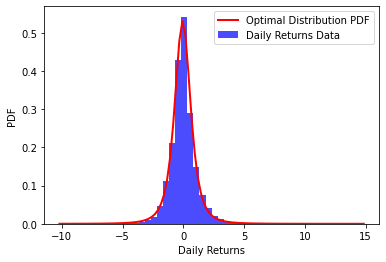

Optimal Location Parameter: 2.853489482530594
Optimal Scale Parameter: -0.06273682946459996
Optimal Degrees of Freedom: 0.6888138484449945


In [15]:
# f)
from scipy.optimize import minimize

data1 = daily_returns_pct.dropna()

# Define the negative log-likelihood function
def neg_log_likelihood(params):
    df, loc, scale = params
    dist = t(df, loc, scale)
    log_likelihood = np.sum(np.log(dist.pdf(data1)))
    return -log_likelihood

# Initial guess for parameters
initial_params = [3, 0, 1]

# Minimize the negative log-likelihood function to find optimal parameters
result = minimize(neg_log_likelihood, initial_params, method='BFGS')

# Extract optimal parameters
optimal_params = result.x
optimal_dist = t(*optimal_params)
x = np.linspace(data1.min(), data1.max(), 100)

plt.hist(data1, bins=50, density=True, alpha=0.7, color='blue', label='Daily Returns Data')
plt.plot(x, optimal_dist.pdf(x), 'r', linewidth=2, label='Optimal Distribution PDF')
plt.xlabel('Daily Returns')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Display optimal parameters
print("Optimal Location Parameter:", optimal_params[0])
print("Optimal Scale Parameter:", optimal_params[1])
print("Optimal Degrees of Freedom:", optimal_params[2])

In [16]:
#g)

MLE_params = t.fit(data1)
print('MLE Location Parameter',MLE_params[0])
print('MLE Scale Parameter',MLE_params[1])

fit_dist = t(*MLE_params)

MLE Location Parameter 2.853495932310387
MLE Scale Parameter -0.06274107728130038


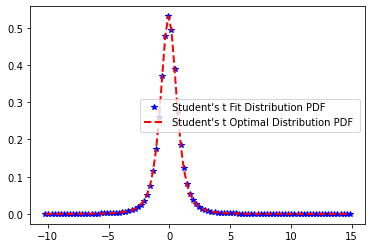

In [17]:
plt.plot(x, fit_dist.pdf(x), '*b', linewidth=2, label='Student\'s t Fit Distribution PDF ')
plt.plot(x, optimal_dist.pdf(x), '--r', linewidth=2, label='Student\'s t Optimal Distribution PDF ')
plt.legend()
plt.show()